In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import os
from pathlib import Path

In [4]:
#import tensorflow as tf

In [5]:
from tensorflow.keras.preprocessing import image

In [6]:
p=Path(".././images")
c=0
dirs=p.glob("*")
labels_dict={"cat":0,"dog":1,"horse":2,"human":3}
image_data=[]
labels=[]
for folder_dir in dirs:
    if c==0 or c==5:
        pass
    else:
        
        label=str(folder_dir).split("\\")[-1][:-1]
        for img_path in folder_dir.glob("*.jpg"):
            img=image.load_img(img_path,target_size=(64,64))
            img_array=image.img_to_array(img)
            image_data.append(img_array)
            labels.append(labels_dict[label])
        #print(label)
    c+=1
    

In [7]:
print(len(image_data))
print(len(labels))

808
808


In [8]:
image_data=np.array(image_data,dtype="float32")/255.0
labels=np.array(labels)
print(image_data.shape)

(808, 64, 64, 3)


In [9]:
## visualise this data

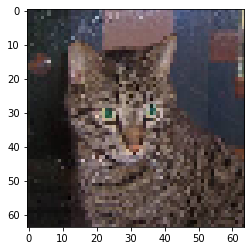

In [10]:
import matplotlib.pyplot as plt
def drawing(img):
    plt.imshow(img)
    return 
drawing(image_data[0])

## shuffling of data

In [11]:
import random

In [12]:
combined=list(zip(image_data,labels))
random.shuffle(combined)
image_data[:],labels[:]=zip(*combined)

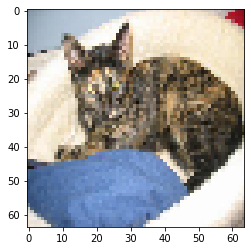

In [13]:
import matplotlib.pyplot as plt
def drawing(img):
    plt.imshow(img)
    return 
drawing(image_data[0])

In [14]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.00001,maxItr=400):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

In [15]:
#conversion of data into one vs one

In [16]:
M=image_data.shape[0]
image_data=image_data.reshape(M,-1)
print(image_data.shape)

(808, 12288)


In [17]:
classes=len(np.unique(labels))
print(classes)

4


In [18]:
def classWiseData(x,y):
    data={}
    for i in range (classes):
        data[i]=[]
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    for k in data.keys():
        data[k]=np.array(data[k])
    return data

In [19]:
data=classWiseData(image_data,labels)

In [20]:
print(data[0].shape)
data[1].shape[0]
data[2].shape[0]
data[3].shape[0]

(202, 12288)


202

In [21]:
def getDataPairforSVM(d1,d2):
    l1,l2=d1.shape[0],d2.shape[0]
    samples=l1+l2
    features=d1.shape[1] 
    data_pair=np.zeros((samples,features))
    data_labels=np.zeros((samples,))
    data_pair[:l1,:]=d1
    data_pair[l1:,:]=d2
    data_labels[:l1]=-1
    data_labels[l1:]=1
    return data_pair,data_labels

In [22]:
## TRAINING NC2 SVM PART

In [24]:
mysvm=SVM()

In [25]:
def trainSVMs(x,y):
    svm_classifier={}
    for i in range(classes):
        svm_classifier[i]={}
        for j in range(i+1,classes):
            xpair,ypair=getDataPairforSVM(data[i],data[j])
            wts,b,loss=mysvm.fit(xpair,ypair,learning_rate=0.00001,maxItr=400)
            svm_classifier[i][j]=(wts,b)
    return svm_classifier

In [32]:
#svm_classifiers=trainSVMs(image_data,labels)

In [ ]:
#model parameter
print(svm_classifiers[0][1])

In [ ]:
## prediction

In [ ]:
def predict(x):
    
    count = np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b = svm_classifiers[i][j]
            #Take a majority prediction 
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
    
    final_prediction = np.argmax(count)
    #print(count)
    return final_prediction

In [ ]:
def accuracy(x,y):
    
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count += 1
            
    return count/x.shape[0]

In [1]:
from sklearn import svm

In [29]:
svm_classifier=svm.SVC(kernel="linear",C=1.0)

In [30]:
svm_classifier.fit(image_data,labels)
svm_classifier.score(image_data,labels)

0.6584158415841584